<a href="https://colab.research.google.com/github/eildes06/Forecasting/blob/main/task_of_aims_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Seti Açıklaması

Churn_Demo.txt                   : Müşteri ile ilgili kullanım, demografik ve terk etme durumu verilerinin yer aldığı veri setidir.

ID                               : Müşteri Numarası

Roaming                    : Dolaşımda Konuşma Süresi

International                    : Uluslararası Konuşma Süresi

Local                            : Yurt içi Konuşma Süresi

Dropped                          : Hat Düşme Sayısı

Paymethod                        : Ödeme Yöntemi

LocalPlan                        : Yurt içi Tarifesi

RoamingPlan                      : Dolaşım Tarifesi

Sex                              : Cinsiyet

Status                           : Medeni Durum 

Children                         : Çocuk Sayısı

Est_Income                       : Tahmini Gelir

Car_Owner                        : Araç Sahipliği

Usage                            : Kullanım

Age                              : Yaş

Overall Satisfaction             : Genel Memnuniyet Skoru

Churn                            : Müşteri Terk Durumu
-----------------
Comments_Demo.txt                : Müşterilerin çağrı merkezi görüşmelerindeki konuşma içeriklerinin yer aldığı dosyadır.
ID                               : Müşteri Numarası
Comments                         : Konuşma içeriği

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install matplotlib --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/churn_Demo.txt")
df

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,3824,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2070 non-null   int64  
 1   Roaming               2070 non-null   float64
 2   International         2070 non-null   float64
 3   Local                 2070 non-null   float64
 4   Dropped               2070 non-null   int64  
 5   Paymethod             2070 non-null   object 
 6   LocalPlan             2070 non-null   object 
 7   RoamingPlan           2070 non-null   object 
 8   Sex                   2070 non-null   object 
 9   Status                2070 non-null   object 
 10  Children              2070 non-null   int64  
 11  Est_Income            2070 non-null   float64
 12  Car_Owner             2070 non-null   object 
 13  Usage                 2070 non-null   float64
 14  Age                   2070 non-null   float64
 15  Overall Satisfaction 

In [ ]:
df.describe()

,ID,Roaming,International,Local,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1901.151691,16.129338,1.207295,59.080812,0.135749,1.147826,51464.262406,75.855063,42.798081,2.509662
std,1094.709118,9.866626,2.625421,57.542526,0.526189,0.843124,30796.680570,59.741635,14.883739,1.125157
min,1.000000,0.000000,0.000000,0.680000,0.000000,0.000000,96.330000,0.680000,12.326667,1.000000
25%,972.250000,8.090000,0.000000,15.200000,0.000000,0.000000,21084.700000,34.250000,30.886667,2.000000
50%,1874.000000,16.140000,0.000000,39.620000,0.000000,1.000000,55860.000000,57.110000,45.526667,2.000000
75%,2832.000000,22.990000,0.000000,87.460000,0.000000,2.000000,78000.000000,107.020000,54.013333,4.000000
max,3825.000000,59.000000,9.700000,332.460000,4.000000,2.000000,120000.000000,361.880000,77.000000,4.000000


In [ ]:
# mean ve std arasina bakilarak outlier yorumu yap.
# eger std > mean ise outlier olabilir veya yakin olmasi da problem olabilir

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ID                      0
Roaming                 0
International           0
Local                   0
Dropped                 0
Paymethod               0
LocalPlan               0
RoamingPlan             0
Sex                     0
Status                  0
Children                0
Est_Income              0
Car_Owner               0
Usage                   0
Age                     0
Overall Satisfaction    0
Churn                   0
dtype: int64

In [ ]:
df.shape


(2070, 17)

In [ ]:
df.head()

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.0,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.0,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.0,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol


In [ ]:
df.tail().T

,2065,2066,2067,2068,2069
ID,3821,3822,3823,3824,3825
Roaming,0.37,22.17,28.92,26.49,13.19
International,0.0,0.57,0.0,0.0,0.0
Local,28.66,13.45,45.47,12.46,87.09
Dropped,0,0,0,0,0
Paymethod,CC,Auto,CH,CC,CC
LocalPlan,FreeLocal,Budget,Budget,FreeLocal,FreeLocal
RoamingPlan,Standard,Standard,Standard,Standard,Standard
Sex,F,F,F,F,F
Status,S,S,M,M,S


In [ ]:
# value countsa for dongusu yap

In [ ]:
df["Paymethod"].value_counts()

CC      1237
Auto     452
CH       381
Name: Paymethod, dtype: int64

In [ ]:
df["Sex"].value_counts()

F    1320
M     750
Name: Sex, dtype: int64

In [ ]:
df["Churn"].value_counts()

Current    1283
Vol         787
Name: Churn, dtype: int64

In [ ]:
df["LocalPlan"].value_counts()

Budget       1130
FreeLocal     940
Name: LocalPlan, dtype: int64

In [ ]:
df["Car_Owner"].value_counts()

N    1342
Y     728
Name: Car_Owner, dtype: int64

In [ ]:
df["RoamingPlan"].value_counts()

Standard          1431
Intnl_discount     639
Name: RoamingPlan, dtype: int64

In [ ]:
df["Overall Satisfaction"].value_counts()

2    563
4    550
1    501
3    456
Name: Overall Satisfaction, dtype: int64

In [ ]:
df["Status"].value_counts()

M    1226
S     817
D      27
Name: Status, dtype: int64

In [ ]:
df["International"].value_counts()

0.00    1570
0.86      23
8.32      15
4.94      12
1.61      12
        ... 
7.34       1
8.21       1
6.46       1
6.61       1
9.69       1
Name: International, Length: 87, dtype: int64

In [ ]:
df.duplicated().sum()

0

Current    1283
Vol         787
Name: Churn, dtype: int64


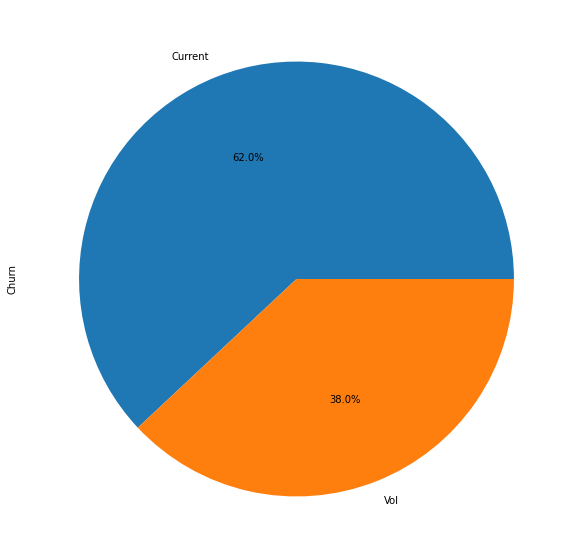

In [ ]:
print(df["Churn"].value_counts())
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<AxesSubplot: >

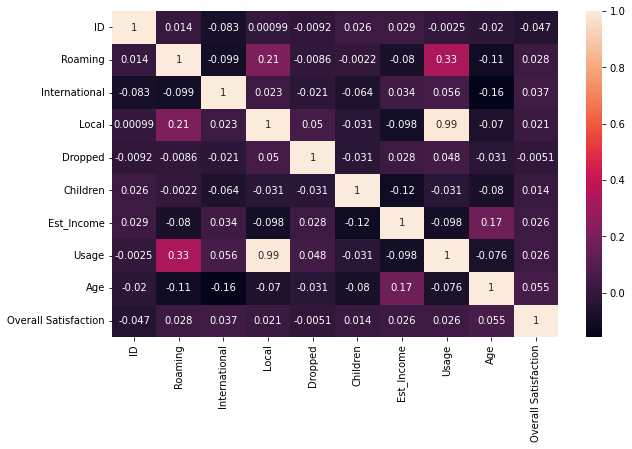

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Usage = Local + international oldugu icin local ve international columlari drop edilebilir.
# usage il localin cor yuksek cikma sebebi international konusmalarin etkisinin az olmasi.

In [ ]:
df[["Local","Usage"]]

,Local,Usage
0,206.08,229.64
1,45.50,75.29
2,22.44,47.25
3,32.88,59.01
4,23.11,28.14
...,...,...
2065,28.66,29.04
2066,13.45,36.20
2067,45.47,74.40
2068,12.46,38.95


In [ ]:
num_col = []
for column in df:
    if df[column].dtypes!='object':
        	num_col.append(column) 

In [ ]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']

In [ ]:
df_num = df[['Churn','ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']]

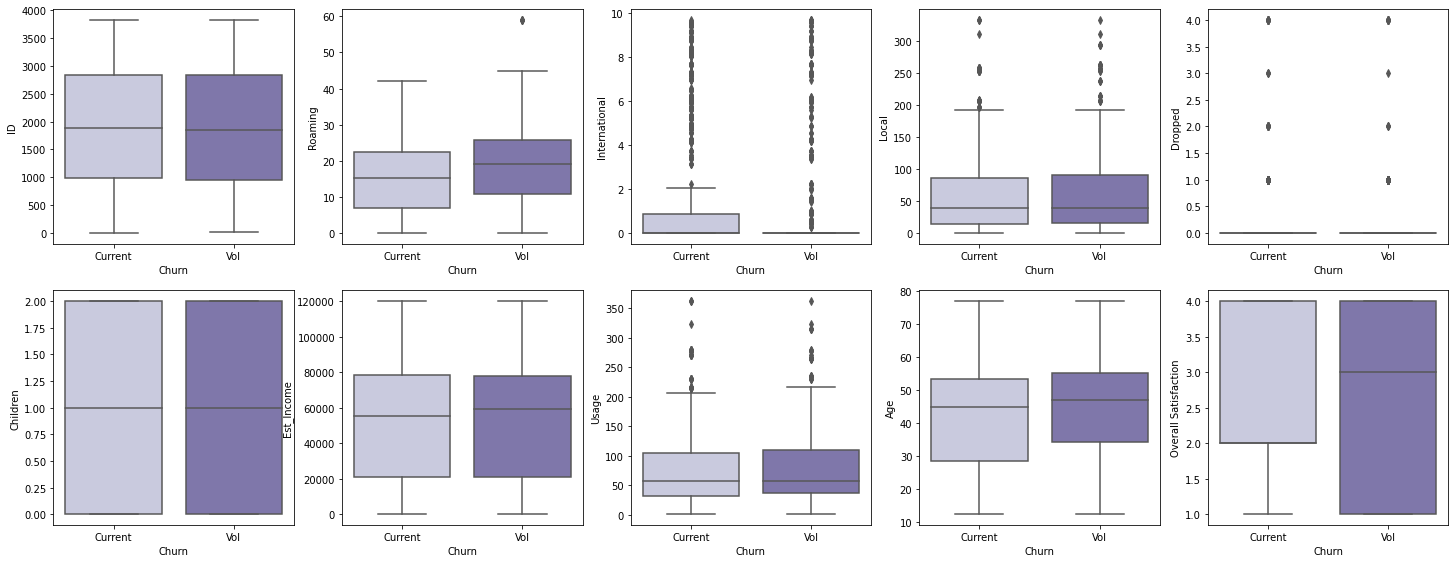

In [ ]:
index = 0
plt.figure(figsize=(25,25))
for feature in df_num:
    if feature != "Churn":
        index += 1
        plt.subplot(5, 5, index)
        sns.boxplot(x='Churn',palette="Purples",y=feature, data=df_num)

In [ ]:
# churn e bakildiginda sag ve sol birbirine cok benziyor. columlar neredeyse biribirinin aynisi
# cok az kucuk farklar var 
# makina bunu ayristiramiyor.
# bu data classification iicn cok uygun bir data degil 
# 

In [ ]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))



categ numericals columns are ['Dropped', 'Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex', 'Status', 'Children', 'Car_Owner', 'Overall Satisfaction', 'Churn']


In [ ]:
# matplotlip version ile alakali bu hata

In [ ]:
#pip install matplotlib --upgrade

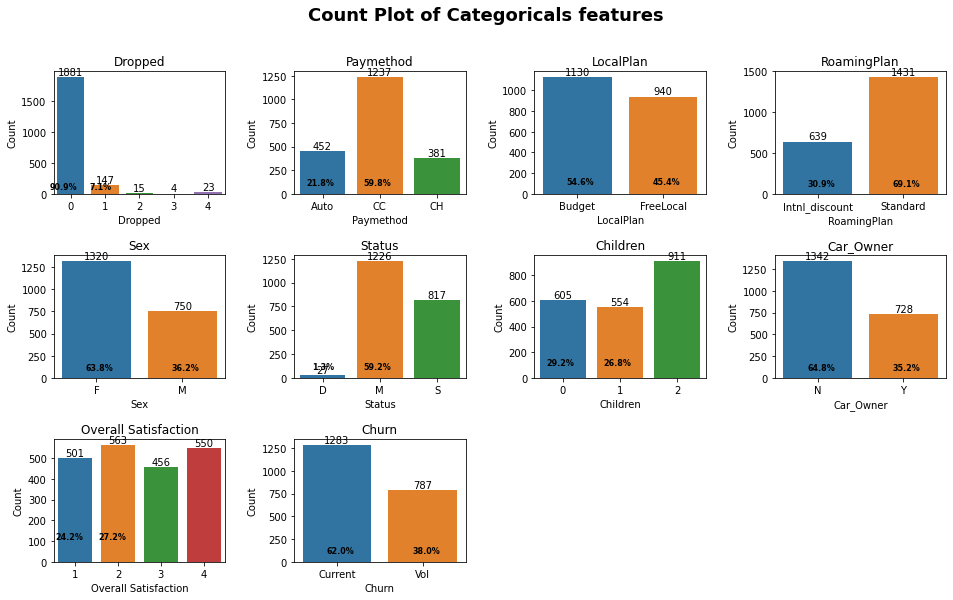

In [ ]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(5, 4, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

In [ ]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

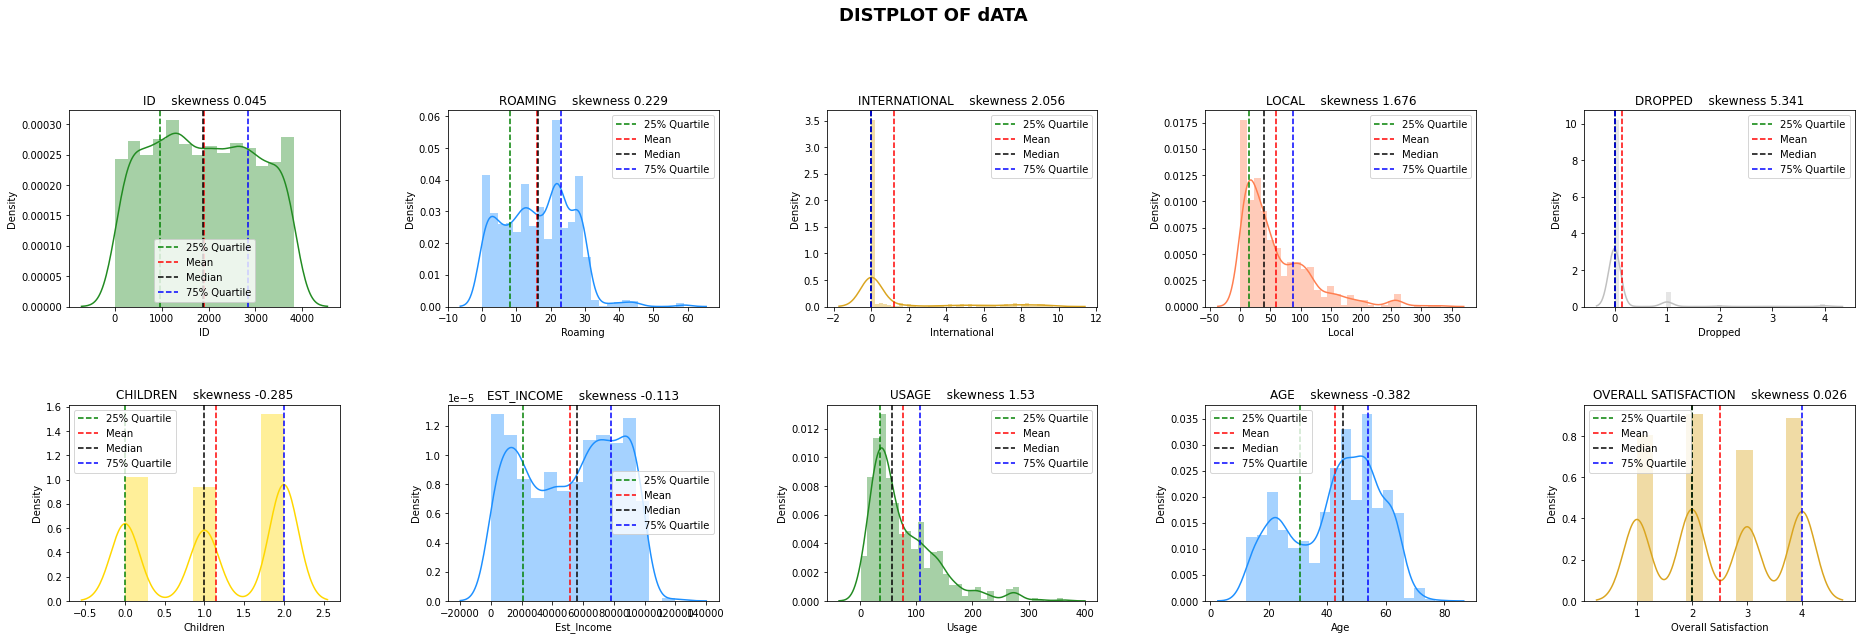

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col):
    ax = fig.add_subplot(5, 5, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

In [ ]:
# curenrt ile val dagilimlarini target dagilimina bakabilirsin
# plotly de yaparsan color eklersen daha iyi olir
# her  feature n kendi icindeki dagilimi
# outlier degerlerimiz gorebiliyoruz onlari burdada kontrol ettik.

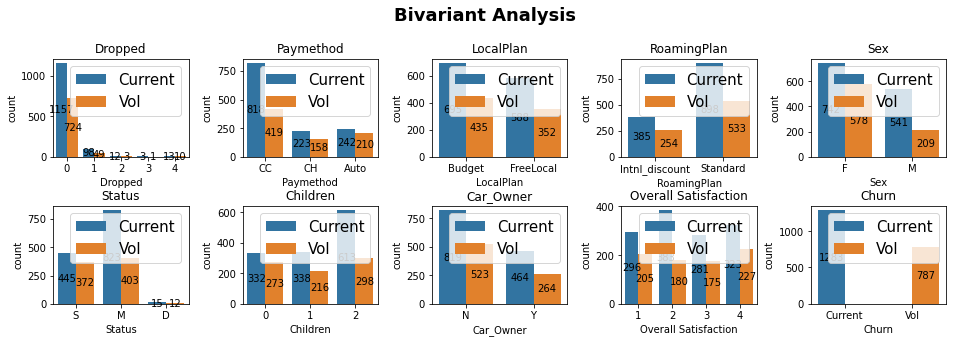

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(5, 5, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

In [ ]:
# her featurn kendi icindeki churn sayilarini goruyoruz.

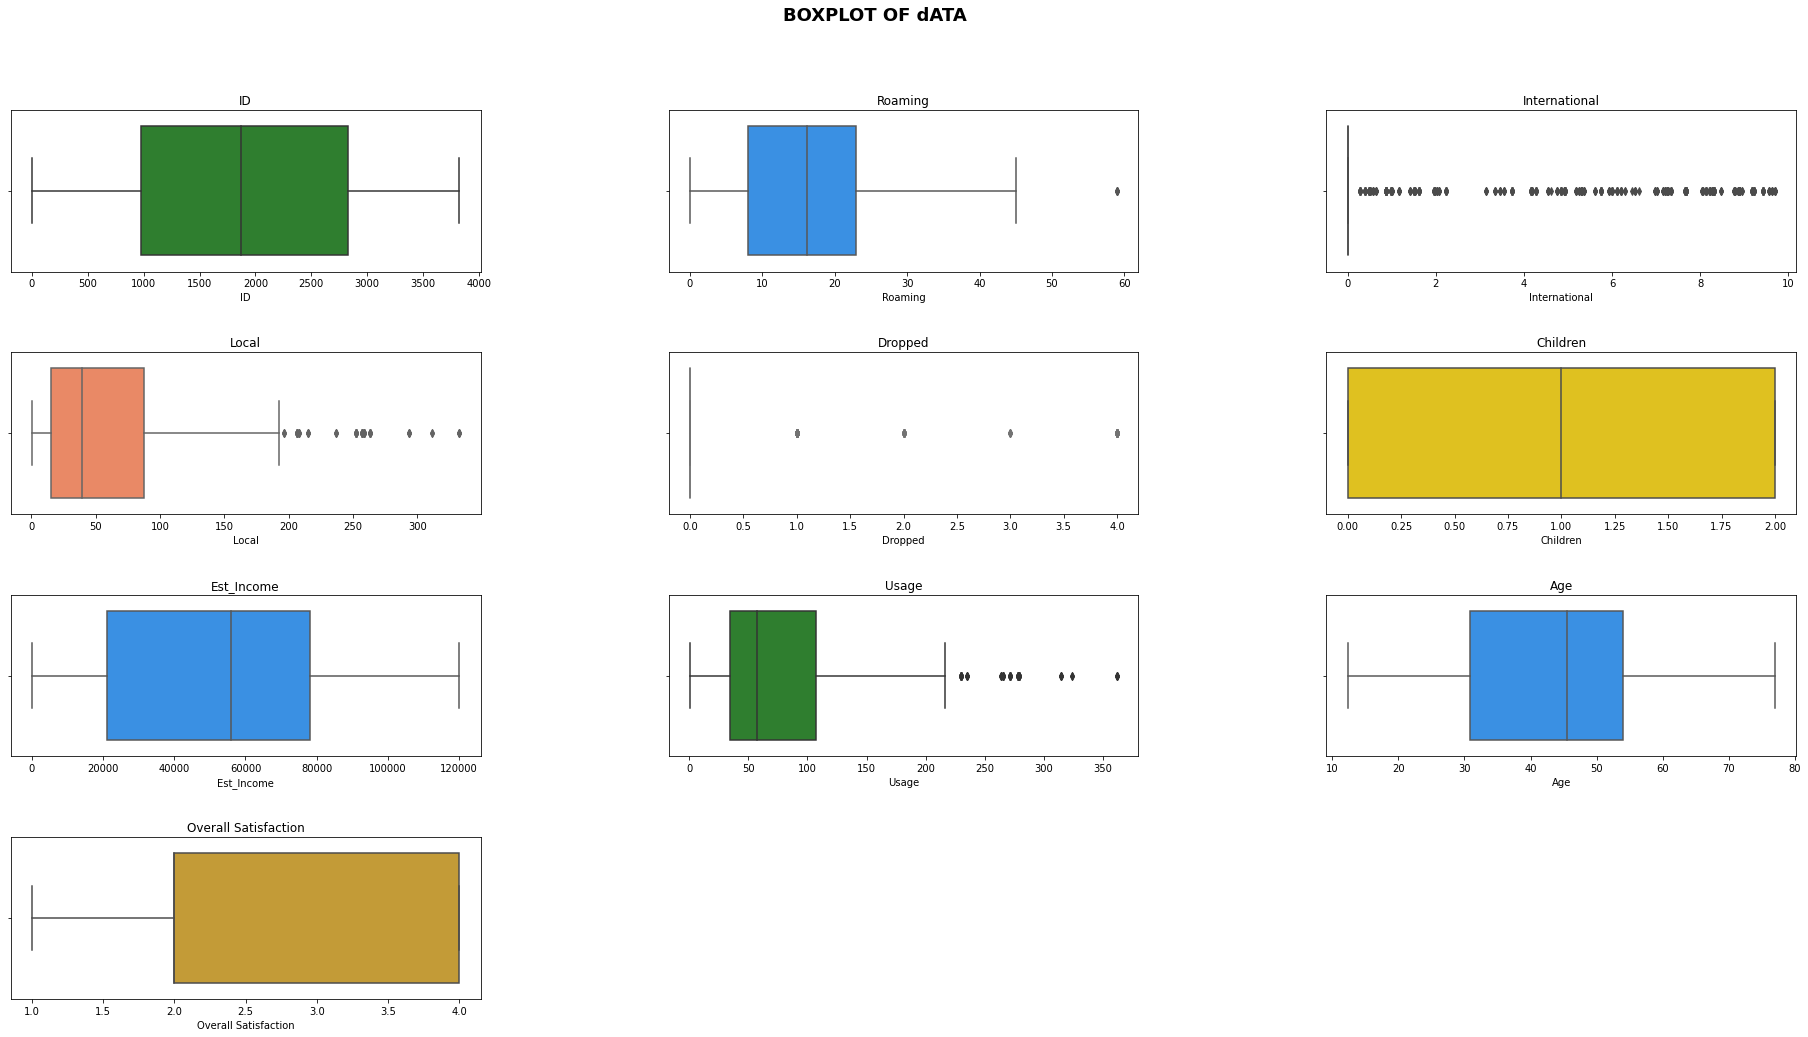

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [ ]:
# featurelarin kendi dagilimlarina baktik
# outloir kontrol ediliyor.
# mesela international gorsume zaten cok az , burda ki ufak gorusme bile outlier gozukuyor ama degil.

# feature engineering

In [ ]:
df.sample(3).T

,456,1970,579
ID,858,3674,1077
Roaming,6.7,12.34,16.79
International,0.0,0.0,0.0
Local,46.33,7.75,81.3
Dropped,0,0,0
Paymethod,CC,Auto,CH
LocalPlan,FreeLocal,Budget,Budget
RoamingPlan,Standard,Intnl_discount,Standard
Sex,F,F,F
Status,M,S,M


In [ ]:
# drop edilecek columlar; 
# id ,
# usage = local + international oldugunda ve internationalin etkisi cok az oldugundan feature engineering yapilip usage birakilir
# local ve international drop edilir.


In [ ]:
df.drop(columns=['ID', 'International','Local'], inplace=True)

In [ ]:
df.columns

Index(['Roaming', 'Dropped', 'Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex',
       'Status', 'Children', 'Est_Income', 'Car_Owner', 'Usage', 'Age',
       'Overall Satisfaction', 'Churn'],
      dtype='object')

In [ ]:
df.corr()

,Roaming,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
Roaming,1.000000,-0.008627,-0.002231,-0.079956,0.330701,-0.107135,0.027840
Dropped,-0.008627,1.000000,-0.031092,0.028236,0.048322,-0.031355,-0.005074
Children,-0.002231,-0.031092,1.000000,-0.116552,-0.030634,-0.079816,0.014288
Est_Income,-0.079956,0.028236,-0.116552,1.000000,-0.097799,0.165739,0.025773
Usage,0.330701,0.048322,-0.030634,-0.097799,1.000000,-0.075551,0.026274
Age,-0.107135,-0.031355,-0.079816,0.165739,-0.075551,1.000000,0.055447
Overall Satisfaction,0.027840,-0.005074,0.014288,0.025773,0.026274,0.055447,1.000000


In [ ]:
# df corr icinde churn yok ncode et sonra yeniden dene 

In [ ]:
enc = {"Vol":1, "Current":0}  
df["churn"] = df["Churn"].replace(enc)

In [ ]:
df.churn.value_counts()

0    1283
1     787
Name: churn, dtype: int64

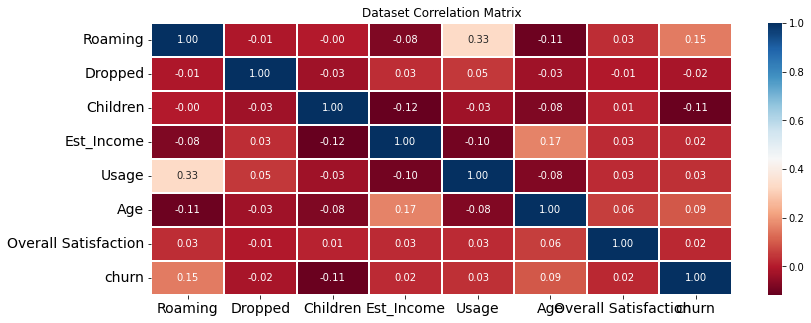

In [ ]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [ ]:
df.drop(columns=['Churn'], inplace=True)

# Data Pre-Processing

- ordinal  encoding in 3 oneli ozelligi
   - feature importance olmasi gereken sekilde siralanmasini saglior mesela burda once one hot encoding yaptigimda sex m en entkisiz feature olurken
   - sex f en etkili feature oldu oysaki burda encodingler kullanilsaydi bir birine daha yakin yerlerde olurdu siralamalari.
   -

In [ ]:
# df_dummy= pd.get_dummies(df)
# buna dikkat et data lekage sebep vercek bir hareket 
# ordinal encoding yapman lazim data lekage ortaya cikiyor gormemeisi gereken kismi gormus 
# bu encoding yapman lazim 
# one hot encoing ya da label encoding yap

- ordinal encoder = egr bizim datamizdaki sutunlar bir kesikli continues ise ( aralik var ise 78-90 arasi a puani gibi) veya bir biri uzerine ustunluk belirten,boyut belirten durum var ise (l,smal ,xl gibi),(derecelendirmeler 1.,2., 3. gibi) 
- one hot = nominal kategorik verilerde (cinsiyet ayirirken , renk ayirrken , ustunluk olmayan durumlarda kullanilir)
- get dummy = featurdaki verileri alir ayri ayri feature a donusturr matematiksel deger ver. mesela erkek ve kadin varsa erkek ve kadin icin ayri ayri sutun olusturur eger kisi erkek ise orda 1 diger yerlerde 0 donduurur gibi.

In [ ]:
categ_columns

['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Sex',
 'Status',
 'Children',
 'Car_Owner',
 'Overall Satisfaction',
 'Churn']

In [ ]:
df['Overall Satisfaction'].value_counts()

2    563
4    550
1    501
3    456
Name: Overall Satisfaction, dtype: int64

In [ ]:
df['Car_Owner'].value_counts()


N    1342
Y     728
Name: Car_Owner, dtype: int64

In [ ]:
df['Children'].value_counts()

2    911
0    605
1    554
Name: Children, dtype: int64

In [ ]:
df['Status'].value_counts()

M    1226
S     817
D      27
Name: Status, dtype: int64

In [ ]:
df['RoamingPlan'].value_counts()

Standard          1431
Intnl_discount     639
Name: RoamingPlan, dtype: int64

In [ ]:
df['Dropped'].value_counts()

0    1881
1     147
4      23
2      15
3       4
Name: Dropped, dtype: int64

In [ ]:
df['Paymethod'].value_counts()

CC      1237
Auto     452
CH       381
Name: Paymethod, dtype: int64

In [ ]:
df['LocalPlan'].value_counts()

Budget       1130
FreeLocal     940
Name: LocalPlan, dtype: int64

In [ ]:
# endcoderi pipeline a koy 
# bu islemlere bile gerek yok

In [ ]:
"""from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['RoamingPlan'] = le.fit_transform(df[['RoamingPlan']])
df['Paymethod'] = le.fit_transform(df[['Paymethod']])
df['LocalPlan'] = le.fit_transform(df[['LocalPlan']])
df['Status'] = le.fit_transform(df[['Status']])
df['Car_Owner'] = le.fit_transform(df[['Car_Owner']])"""




"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\n\ndf['RoamingPlan'] = le.fit_transform(df[['RoamingPlan']])\ndf['Paymethod'] = le.fit_transform(df[['Paymethod']])\ndf['LocalPlan'] = le.fit_transform(df[['LocalPlan']])\ndf['Status'] = le.fit_transform(df[['Status']])\ndf['Car_Owner'] = le.fit_transform(df[['Car_Owner']])"

In [ ]:
# one hot , make colum transform() reminder pass true ()

In [ ]:
""" enc2 = OrdinalEncoder(categories=[['F', 'M']])
df['Sex'] = enc2.fit_transform(df[['Sex']]) """

" enc2 = OrdinalEncoder(categories=[['F', 'M']])\ndf['Sex'] = enc2.fit_transform(df[['Sex']]) "

In [ ]:
df.shape

(2070, 14)

In [ ]:
df.sample(2)

,Roaming,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,churn
138,0.00,0,CH,FreeLocal,Intnl_discount,F,M,2,809.43,Y,2.89,31.913333,1,0
565,9.38,0,CC,Budget,Standard,M,S,1,57626.90,Y,48.35,43.906667,1,0


In [ ]:
df.sample().T

,1023
Roaming,20.45
Dropped,0
Paymethod,Auto
LocalPlan,FreeLocal
RoamingPlan,Standard
Sex,F
Status,M
Children,2
Est_Income,50622.3
Car_Owner,N


In [ ]:
# pipeline kullanmam lazim burda data lekage engelleyecek 
#  

In [ ]:
categ_columns

['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Sex',
 'Status',
 'Children',
 'Car_Owner',
 'Overall Satisfaction',
 'Churn']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
cat_onehot = ["Sex","Car_Owner"]

In [ ]:
cat_ordinal =['Dropped',
 'Paymethod',
 'LocalPlan',
 'RoamingPlan',
 'Status',
 'Children',
 'Overall Satisfaction'] 

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False,drop="first"), cat_onehot), 
                                       (OrdinalEncoder(categories='auto'), cat_ordinal),
                                       remainder= MinMaxScaler()) 

In [ ]:
operations = [("preprocessor", column_trans), ("Log_model", LogisticRegression(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
df, predict = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.95*len(df))])

In [ ]:
X = df.drop(["churn"], axis=1)
y = df["churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)

In [ ]:

def model_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [ ]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.646693,0.558376
Precision,0.565868,0.447368
Recall,0.282511,0.204819
f1,0.376869,0.280992


In [ ]:
# recall en onemli metrigimiz dogru tahmin etmek onemli. 
# tahminimiz yuzde 56 ama biz yuzde 38 dogru tahmin etmisiz

In [ ]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

test_accuracy      0.641622
train_accuracy     0.645060
test_precision     0.552677
train_precision    0.562206
test_recall        0.272071
train_recall       0.277365
test_f1            0.363864
train_f1           0.371299
dtype: float64

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,random_state = 42))]
pipe_model_log_grid = Pipeline(steps=operations)

In [ ]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

param_grid = {"logm__penalty" : penalty,
             "logm__l1_ratio" : l1_ratio,
             "logm__C" : C,
             "logm__solver" : solver
             }

In [ ]:
grid_log_model = GridSearchCV(pipe_model_log_grid, param_grid = param_grid, scoring="recall", cv=10)

In [ ]:
grid_log_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'Car_Owner']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['Dropped'

In [ ]:
model_scorer(grid_log_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.644997,0.563452
Precision,0.560831,0.461538
Recall,0.282511,0.216867
f1,0.375746,0.295082


In [ ]:
grid_log_model.best_params_

{'logm__C': 3.3598182862837818,
 'logm__l1_ratio': 0.0,
 'logm__penalty': 'l1',
 'logm__solver': 'liblinear'}

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,
                                                                      random_state = 42, C= 3.3598182862837818,
                                                                      l1_ratio= 0.0,
                                                                      penalty= 'l2',
                                                                      solver= 'liblinear'))]
pipe_model_log_final = Pipeline(steps=operations)

In [ ]:
pipe_model_log_final.fit(X_train, y_train)
log_scorer= model_scorer(pipe_model_log_final, X_train, y_train, X_test, y_test)
log_scorer

,train_set,test_set
Accuracy,0.644997,0.563452
Precision,0.560831,0.461538
Recall,0.282511,0.216867
f1,0.375746,0.295082


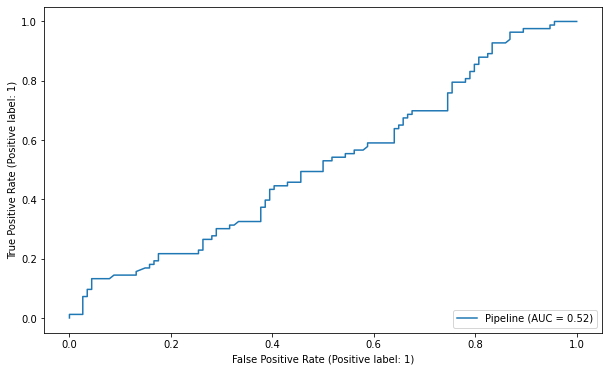

In [ ]:
plot_roc_curve(pipe_model_log_final, X_test, y_test);

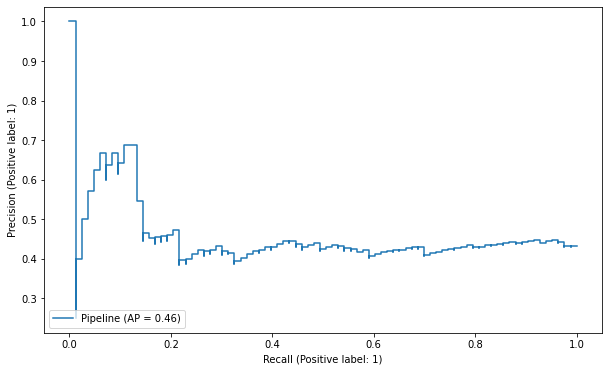

In [ ]:
plot_precision_recall_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
log_acc = log_scorer["test_set"][0]

# Xg_Boost

In [ ]:
#  pipe line kullan burda da 

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
pipe_model_Xgboost.fit(X_train, y_train)
model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.744488,0.588832
Precision,0.751740,0.527778
Recall,0.484305,0.228916
f1,0.589091,0.319328


In [ ]:
xgb_params = {"Xgboost__n_estimators": [50, 100, 150],
             "Xgboost__subsample":[0.6,0.8,1],
             "Xgboost__max_depth":[3,5,7],
             "Xgboost__learning_rate":[0.1,0.001,0.01]}

In [ ]:
xgb_grid_model = GridSearchCV(pipe_model_Xgboost , xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [ ]:
xgb_grid_model.best_params_

{'Xgboost__learning_rate': 0.1,
 'Xgboost__max_depth': 5,
 'Xgboost__n_estimators': 150,
 'Xgboost__subsample': 1}

In [ ]:
# grid yerine optuna kullan. sonra grid dene

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,
                                                                    random_state=42,
                                                                    learning_rate = 0.1, 
                                                                    max_depth = 5, 
                                                                    n_estimators= 100, 
                                                                    subsample= 0.8))]
pipe_final_xgb_model = Pipeline(steps=operations)

In [ ]:
pipe_final_xgb_model.fit(X_train, y_train)
xgb_scorer = model_scorer(pipe_final_xgb_model, X_train, y_train, X_test, y_test)
xgb_scorer

,train_set,test_set
Accuracy,0.819672,0.609137
Precision,0.828947,0.550000
Recall,0.659193,0.397590
f1,0.734388,0.461538


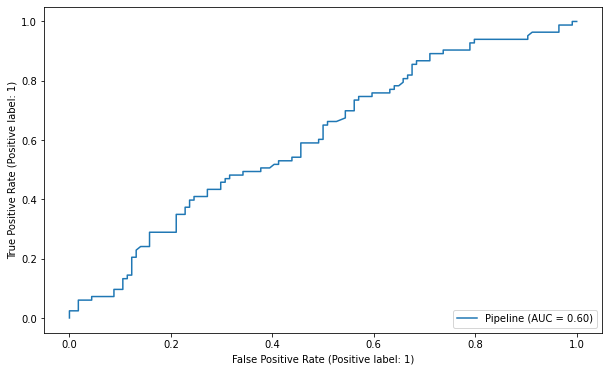

In [ ]:
plot_roc_curve(pipe_final_xgb_model, X_test, y_test);

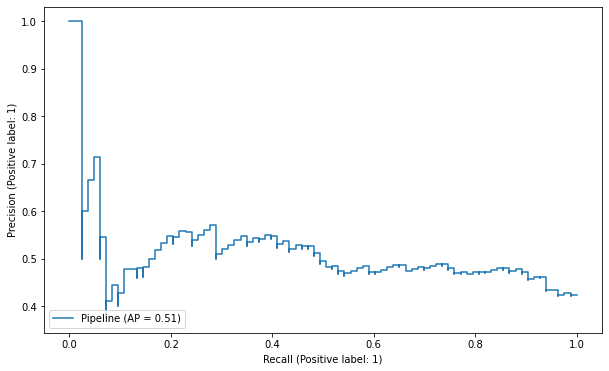

In [ ]:
plot_precision_recall_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
#  trasehold ile oyna  , degeisik agirliklari dene ayri ayri dene.

In [ ]:
xb_acc = xgb_scorer["test_set"][0]

In [ ]:
pipe_final_xgb_model.steps[1][1].feature_importances_

array([0.15434922, 0.05098036, 0.06303876, 0.06140721, 0.06476672,
       0.06948879, 0.09089535, 0.08845618, 0.0469836 , 0.09397961,
       0.07626125, 0.06642105, 0.0729719 ], dtype=float32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data=pipe_final_xgb_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

,Feature Importance
Roaming,0.154349
Car_Owner,0.093980
Status,0.090895
Children,0.088456
Usage,0.076261
Overall Satisfaction,0.072972
Sex,0.069489
Age,0.066421
RoamingPlan,0.064767
Paymethod,0.063039


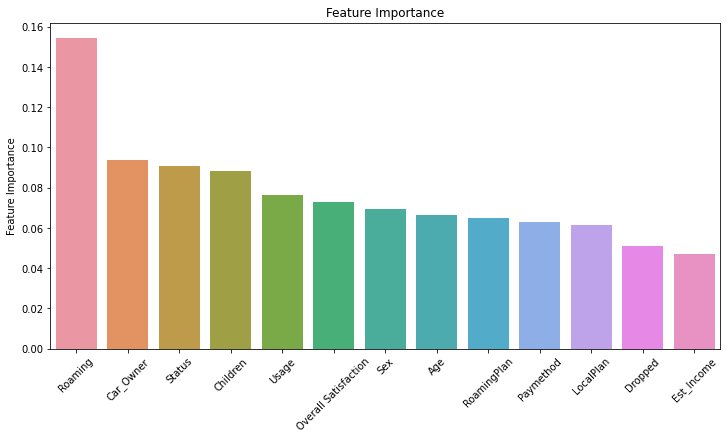

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# # # 

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Data/Comments_Demo.csv')

In [ ]:
df2 = df0.copy()
df2.sample(13)

,"ID,Comments"
484,84|Really wants the new phone from XVYX which ...
1668,2392|Wants to get an additional line working b...
1981,2078|Cant get his call forwarding to work. I s...
1918,1734|Wants information on our Internet service...
360,1620|Really wants the new phone from XVYX whic...
828,"353,""He says that his phone works fine when us..."
1088,"748,""Wanted to know the nearest store location..."
1676,1266|Wanted to know the nearest store location...
540,"3232,""Wants a new faceplate."""
779,"2071,""Asked how to disable call waiting. refer..."


In [ ]:
""" def split_sep(x):
  if x.__contains__(","):
      return x.split(",")[0]
  elif x.__contains__("\|") :
      return x.split("\|")[0]
df["id"] = df["ID,Comments"].apply(split_sep)"""

' def split_sep(x):\n  if x.__contains__(","):\n      return x.split(",")[0]\n  elif x.__contains__("\\|") :\n      return x.split("\\|")[0]\ndf["id"] = df["ID,Comments"].apply(split_sep)'

In [ ]:
"""def split_sep1(x):
  if x.__contains__(","):
      return x.split(",")[1]
  elif x.__contains__("\|") :
      return x.split("\|")[1]
df["Comments"] = df["ID,Comments"].apply(split_sep1)"""

'def split_sep1(x):\n  if x.__contains__(","):\n      return x.split(",")[1]\n  elif x.__contains__("\\|") :\n      return x.split("\\|")[1]\ndf["Comments"] = df["ID,Comments"].apply(split_sep1)'

In [ ]:
df2["ID,Comments"] = df2["ID,Comments"].str.replace('|','__').astype("str")
df2["ID,Comments"] = df2["ID,Comments"].str.replace(',','__')
df2["ID,Comments"] = df2["ID,Comments"].str.split("__")
df2["ID"] = df2["ID,Comments"].apply(lambda x : x[0])
df2["Comments"] = df2["ID,Comments"].apply(lambda x : x[1])
df2.drop(columns="ID,Comments",inplace=True)
df2.sample

<bound method NDFrame.sample of         ID                                           Comments
0     1309  "Does not like the way the phone works. It is ...
1     3556  "Wanted to know the nearest store location. Wa...
2     2230  "Wants to know how to do text messaging. Refer...
3     2312  "Asked how to disable call waiting. referred h...
4     3327  "Needs help learning how to use the phone. I s...
...    ...                                                ...
2061  1453  "Asked about how to change his ring tones. Ref...
2062   383                                   "Handset sucked"
2063  2204  "Wants information on our Internet service. Re...
2064   505  "Wanted to know the nearest store location. Wa...
2065  3034  "Needed help figuring out his bill. I explaine...

[2066 rows x 2 columns]>

In [ ]:
df2.sample(16)

,ID,Comments
1246,130,This customer was very unhappy. He said he wil...
208,652,"""He lost his phone and called to cancel servic..."
910,2662,"""Wanted to know the nearest store location. Wa..."
1791,895,"""Handset sucked"""
1045,2720,Wants information on our Internet service. Ref...
1771,3253,Wants to know how to do text messaging. Referr...
1869,1640,Cant get his call forwarding to work. I should...
62,1148,He lost his phone and called to cancel service...
1051,3640,Hopes to get an additonal line working by the ...
1361,2438,"""Wanted to know the nearest store location. Wa..."


In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 24.3 MB/s 
     |████████████████████████████████| 81 kB 11.1 MB/s 
     |████████████████████████████████| 5.8 MB 13.5 MB/s 
     |████████████████████████████████| 132 kB 76.3 MB/s 
     |████████████████████████████████| 182 kB 55.5 MB/s 
     |████████████████████████████████| 213 kB 61.7 MB/s 
     |████████████████████████████████| 127 kB 47.8 MB/s 
     |████████████████████████████████| 7.6 MB 48.8 MB/s 
     |████████████████████████████████| 1.3 MB 47.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
# hazir bert modellerden huggig face deki dissilbert modeli ile labelledim

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# yukardaki gibi kisinin kalmasini 0 , ayrilmasini yani aranan durumu 0 atamistik
# burda da kisinin olumlu yorumu 0, olumsuuzu 1 atadik.

In [ ]:
y_pred = []
for i in df2["Comments"]:
  if classifier(i)[0]["label"] == "POSITIVE":
    y_pred.append(0)
  else:
    y_pred.append(1)
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])
predict

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
2061,1
2062,1
2063,1
2064,1


1    2004
0      62
Name: Prediction, dtype: int64


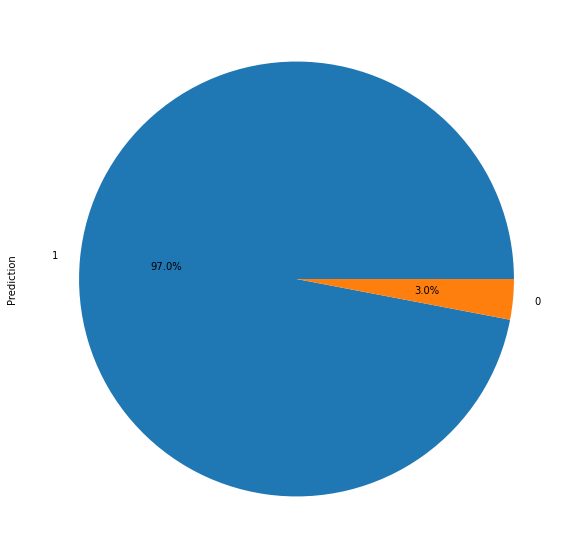

In [ ]:
print(predict["Prediction"].value_counts())
predict["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])

In [ ]:
predict

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
2061,1
2062,1
2063,1
2064,1


In [ ]:
df_result = pd.concat([df2["Comments"], predict["Prediction"]], axis= 1)

In [ ]:
df_result.head()

,Comments,Prediction
0,"""Does not like the way the phone works. It is ...",1
1,"""Wanted to know the nearest store location. Wa...",1
2,"""Wants to know how to do text messaging. Refer...",1
3,"""Asked how to disable call waiting. referred h...",1
4,"""Needs help learning how to use the phone. I s...",1


In [ ]:
df_result["Prediction"].value_counts()

1    2004
0      62
Name: Prediction, dtype: int64

1    2004
0      62
Name: Prediction, dtype: int64


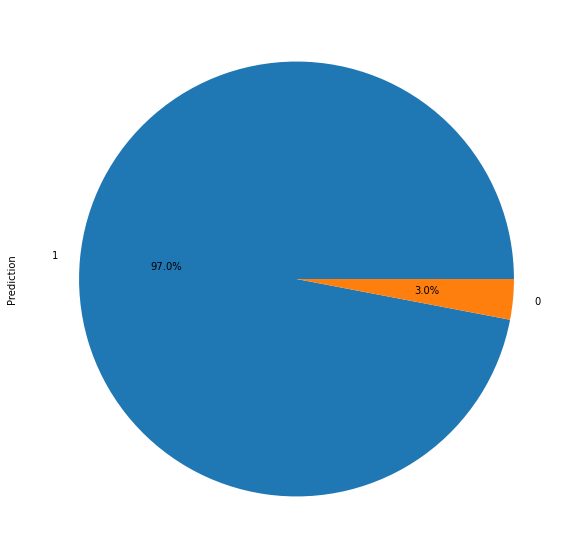

In [ ]:
print(df_result["Prediction"].value_counts())
df_result["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
# bu datanin yroumlari kotu gelmesi data da ki imbalance daha balance hale geliyor

- Bundan onceki calisma comentler eklenmeden yapilmistir
- ama burdan asagida comment ler ile ilgili gerekli analizler eklenerek calismaya devam edilmistir.

In [ ]:
df

,Roaming,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,churn
1181,15.70,0,CC,FreeLocal,Intnl_discount,F,M,1,66921.4,Y,24.67,62.000000,1,0
69,6.11,0,CC,Budget,Standard,M,M,2,28766.9,N,64.20,46.840000,1,0
351,13.05,0,CH,FreeLocal,Standard,M,M,1,64792.3,N,51.41,52.146667,1,0
1163,13.05,0,CH,FreeLocal,Standard,M,M,1,64792.3,N,51.41,52.146667,2,1
429,14.39,0,CC,Budget,Standard,F,S,2,15688.5,N,22.42,53.060000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,5.59,0,Auto,Budget,Standard,M,S,1,78554.2,N,35.88,16.700000,2,0
379,0.57,2,Auto,Budget,Standard,F,M,0,83287.0,N,24.46,44.000000,2,1
187,12.89,0,Auto,FreeLocal,Intnl_discount,F,S,1,67239.4,N,66.70,44.433333,2,0
763,6.97,0,Auto,Budget,Standard,M,S,2,78373.5,N,199.91,35.346667,2,0


In [ ]:
predict


In [ ]:
df_new = pd.concat([df, predict['Prediction']], axis= 1)
df_new.sample(16)

,Roaming,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,churn,Prediction
42,8.21,0.0,CC,FreeLocal,Standard,M,M,1.0,97180.40,N,63.51,50.600000,4.0,0.0,1.0
1744,18.94,0.0,Auto,FreeLocal,Standard,F,S,0.0,93454.30,Y,44.13,48.533333,3.0,0.0,0.0
557,23.56,0.0,CC,Budget,Intnl_discount,F,S,1.0,41000.00,N,229.64,24.393333,2.0,1.0,1.0
1834,11.91,0.0,Auto,Budget,Standard,F,S,2.0,14578.80,Y,107.02,60.933333,2.0,1.0,1.0
1712,27.42,0.0,CC,Budget,Standard,M,M,2.0,49910.70,Y,51.14,51.520000,3.0,0.0,1.0
346,26.99,0.0,CC,FreeLocal,Standard,M,M,2.0,91272.20,Y,40.00,25.033333,3.0,0.0,1.0
1357,2.84,0.0,CH,Budget,Intnl_discount,F,M,2.0,49745.30,N,27.28,47.966667,2.0,1.0,1.0
1067,11.14,0.0,CH,FreeLocal,Intnl_discount,F,M,2.0,84948.00,Y,23.73,29.446667,1.0,0.0,1.0
1536,7.74,0.0,CC,Budget,Standard,F,M,0.0,95405.70,N,13.96,70.000000,3.0,1.0,1.0
267,29.93,0.0,CC,Budget,Intnl_discount,M,S,2.0,63152.60,Y,70.01,63.173333,1.0,1.0,1.0


In [ ]:
df_new.shape

(2069, 15)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2069
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Roaming               1966 non-null   float64
 1   Dropped               1966 non-null   float64
 2   Paymethod             1966 non-null   object 
 3   LocalPlan             1966 non-null   object 
 4   RoamingPlan           1966 non-null   object 
 5   Sex                   1966 non-null   object 
 6   Status                1966 non-null   object 
 7   Children              1966 non-null   float64
 8   Est_Income            1966 non-null   float64
 9   Car_Owner             1966 non-null   object 
 10  Usage                 1966 non-null   float64
 11  Age                   1966 non-null   float64
 12  Overall Satisfaction  1966 non-null   float64
 13  churn                 1966 non-null   float64
 14  Prediction            2066 non-null   float64
dtypes: float64(9), object

In [ ]:
df_new.isnull().sum()

Roaming                 103
Dropped                 103
Paymethod               103
LocalPlan               103
RoamingPlan             103
Sex                     103
Status                  103
Children                103
Est_Income              103
Car_Owner               103
Usage                   103
Age                     103
Overall Satisfaction    103
churn                   103
Prediction                3
dtype: int64

In [ ]:
df_new.dropna(axis=0 ,inplace= True)
df_new.isnull().sum()

Roaming                 0
Dropped                 0
Paymethod               0
LocalPlan               0
RoamingPlan             0
Sex                     0
Status                  0
Children                0
Est_Income              0
Car_Owner               0
Usage                   0
Age                     0
Overall Satisfaction    0
churn                   0
Prediction              0
dtype: int64

In [ ]:
df3, predict = \
              np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.95*len(df))])

In [ ]:
X = df3.drop(["churn"], axis=1)
y = df3["churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)


In [ ]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.632738,0.684492
Precision,0.555556,0.488372
Recall,0.268405,0.362069
f1,0.361944,0.415842


In [ ]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

test_accuracy      0.625595
train_accuracy     0.633862
test_precision     0.553524
train_precision    0.557616
test_recall        0.265524
train_recall       0.272494
test_f1            0.353312
train_f1           0.365856
dtype: float64

In [ ]:
grid_log_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Sex',
                                                                          'Car_Owner']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['Dropped'

In [ ]:
model_scorer(grid_log_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.629762,0.684492
Precision,0.548077,0.488372
Recall,0.262270,0.362069
f1,0.354772,0.415842


In [ ]:
grid_log_model.best_params_

{'logm__C': 3.3598182862837818,
 'logm__l1_ratio': 0.0,
 'logm__penalty': 'l2',
 'logm__solver': 'liblinear'}

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,
                                                                      random_state = 42, C= 3.3598182862837818,
                                                                      l1_ratio= 0.0,
                                                                      penalty= 'l2',
                                                                      solver= 'liblinear'))]
pipe_model_log_final = Pipeline(steps=operations)

In [ ]:
pipe_model_log_final.fit(X_train, y_train)
log_2_scorer= model_scorer(pipe_model_log_final, X_train, y_train, X_test, y_test)
log_2_scorer

,train_set,test_set
Accuracy,0.629762,0.684492
Precision,0.548077,0.488372
Recall,0.262270,0.362069
f1,0.354772,0.415842


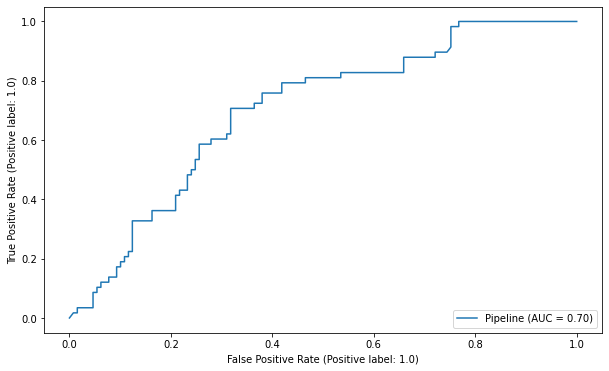

In [ ]:
plot_roc_curve(pipe_model_log_final, X_test, y_test);

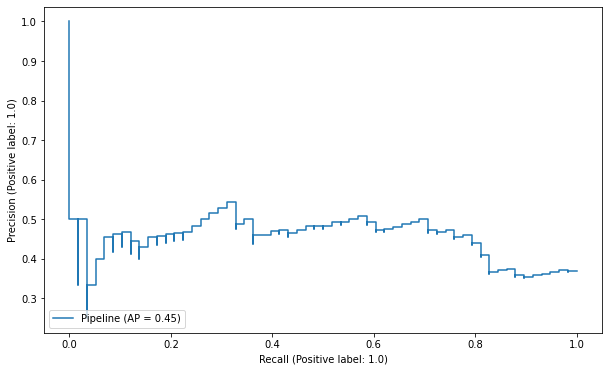

In [ ]:
plot_precision_recall_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
log_2_acc = log_scorer["test_set"][0]

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
pipe_model_Xgboost.fit(X_train, y_train)
xgb_van_scorer = model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)
xgb_van_scorer

,train_set,test_set
Accuracy,0.733929,0.727273
Precision,0.755611,0.589744
Recall,0.464724,0.396552
f1,0.575499,0.474227


In [ ]:
xgb_van__acc = xgb_van_scorer["test_set"][0]

In [ ]:
xgb_params = {"Xgboost__n_estimators": [100, 150 ,200],
             "Xgboost__subsample":[0.6,0.8,1],
             "Xgboost__max_depth":[1, 2, 3, 4, 5, 6, 7],
             "Xgboost__learning_rate":[0.1,0.001,0.01]}

In [ ]:
xgb_grid_model = GridSearchCV(pipe_model_Xgboost , xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 189 candidates, totalling 1890 fits


In [ ]:
xgb_grid_model.best_params_

{'Xgboost__learning_rate': 0.01,
 'Xgboost__max_depth': 7,
 'Xgboost__n_estimators': 150,
 'Xgboost__subsample': 0.8}

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,
                                                                    random_state=42,
                                                                    learning_rate = 0.07, 
                                                                    max_depth = 4, 
                                                                    n_estimators= 150, 
                                                                    subsample= 0.8,
                                                                    ))]
pipe_final_xgb_model = Pipeline(steps=operations)

In [ ]:
pipe_final_xgb_model.fit(X_train, y_train)
xgb_2_scorer = model_scorer(pipe_final_xgb_model, X_train, y_train, X_test, y_test)
xgb_2_scorer

TypeError: ignored

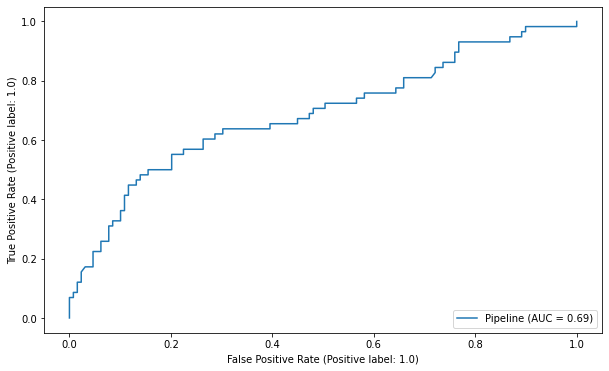

In [ ]:
plot_roc_curve(pipe_final_xgb_model, X_test, y_test);

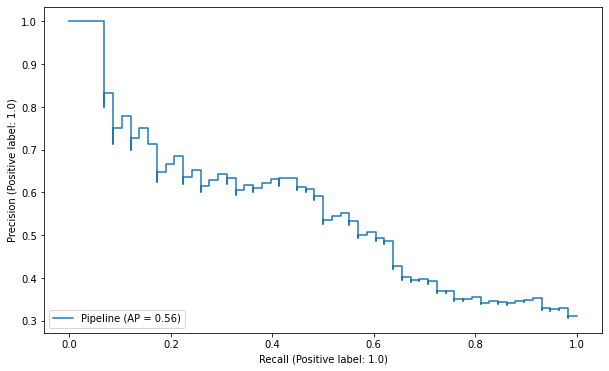

In [ ]:
plot_precision_recall_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
xb_2_acc = xgb_scorer["test_set"][0]

In [ ]:
pipe_final_xgb_model.steps[1][1].feature_importances_

array([0.14334948, 0.05867292, 0.07511174, 0.05680256, 0.04350112,
       0.05588166, 0.06883913, 0.07846095, 0.04912518, 0.09061088,
       0.07449119, 0.06815853, 0.07438429, 0.06261034], dtype=float32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data=pipe_final_xgb_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

,Feature Importance
Roaming,0.143349
Car_Owner,0.090611
Children,0.078461
Paymethod,0.075112
Usage,0.074491
Overall Satisfaction,0.074384
Status,0.068839
Age,0.068159
Prediction,0.062610
Dropped,0.058673


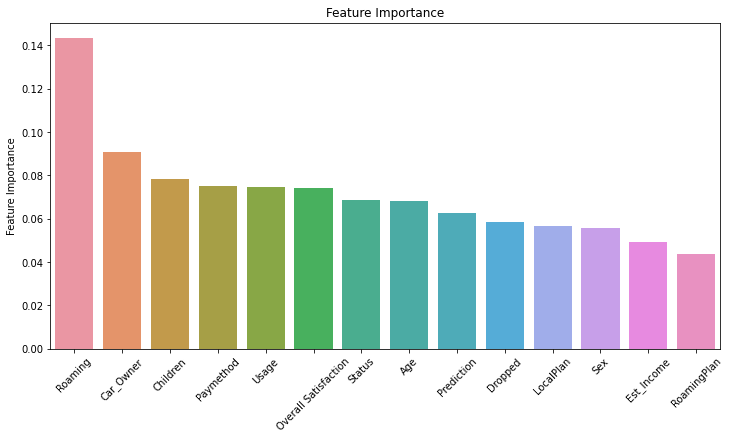

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [ ]:
model_scorer = pd.concat((log_scorer, xgb_scorer, log_2_scorer, xgb_van_scorer, xgb_2_scorer), axis=1)
model_scorer

,train_set,test_set,train_set,test_set,train_set,test_set,train_set,test_set,train_set,test_set
Accuracy,0.629762,0.684492,0.742857,0.727273,0.629762,0.684492,0.733929,0.727273,0.786905,0.743316
Precision,0.548077,0.488372,0.761905,0.589744,0.548077,0.488372,0.755611,0.589744,0.781609,0.608696
Recall,0.262270,0.362069,0.490798,0.396552,0.262270,0.362069,0.464724,0.396552,0.625767,0.482759
f1,0.354772,0.415842,0.597015,0.474227,0.354772,0.415842,0.575499,0.474227,0.695060,0.538462


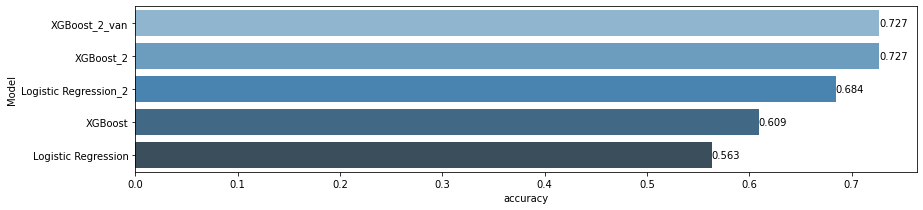

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "XGBoost","Logistic Regression_2", "XGBoost_2_van","XGBoost_2"],
                        "accuracy": [log_acc, xb_acc, log_2_acc, xgb_van__acc, xb_2_acc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                            
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),             
                ha = 'left',                        
                va = 'center')                         
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

In [ ]:
X_pred = predict.drop(["churn"], axis=1)
y_real = predict[["churn"]].reset_index()

In [ ]:
y_pred = pipe_final_xgb_model.predict(X_pred)

In [ ]:
y_pred_proba = pd.DataFrame(pipe_final_xgb_model.predict_proba(X_pred))

In [ ]:
df_result = pd.concat((y_real, pd.Series(y_pred,name="predict").to_frame(), 
                       y_pred_proba), axis=1)
df_result

,index,churn,predict,0,1
0,736,1.0,1.0,0.410573,0.589427
1,1581,0.0,0.0,0.598934,0.401066
2,1941,1.0,1.0,0.388934,0.611066
3,1889,1.0,0.0,0.720853,0.279147
4,1189,0.0,1.0,0.436083,0.563917
...,...,...,...,...,...
91,1190,0.0,0.0,0.757963,0.242037
92,1360,0.0,0.0,0.603406,0.396594
93,905,0.0,0.0,0.776669,0.223331
94,1539,1.0,0.0,0.696488,0.303512


In [ ]:
df_result['churn'].value_counts()

0.0    56
1.0    40
Name: churn, dtype: int64

In [ ]:
df_result["predict"].value_counts()

0.0    64
1.0    32
Name: predict, dtype: int64

In [ ]:
# 96 taneden normalde birakan varken 32 tane oldugunu soylemis.32 tane bilmis 

In [ ]:
# ordinal encod kullanmadigindan hatali.
# get dummy sadece sacde analiz etmen lazimken kullanir
# hepsine ordinal encoding kullan.
# ml de get dummy kullanilmazzz dikkat et
# 